# <center>Temporal Analysis </center>

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv("../dataset/final_combined_dataset_v3.csv")
df

,stop_id,stop_cause,service_area,subject_race,subject_sex,subject_age,date_stop,time_stop,sd_resident,arrested,searched,search_details_id,search_details_type,search_details_description
0,1190311,0,830,1,0.0,21,03-01-2014,00:00,1,0,0,1370879,0,Citation
1,1190311,0,830,1,0.0,21,03-01-2014,00:00,1,0,0,1370880,0,Other
2,1190311,0,830,1,0.0,21,03-01-2014,00:00,1,0,0,1370881,1,VERBAL NOTICE
3,1045241,1,610,1,1.0,27,04-01-2014,00:00,0,0,0,1209279,0,Citation
4,1045279,0,810,6,1.0,19,05-01-2014,00:00,1,0,0,1209317,0,Citation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430471,1313128,1,110,16,1.0,31,12-01-2016,07:05,1,0,0,1494788,0,Citation
430472,1326673,1,710,16,0.0,49,24-02-2016,08:42,1,0,0,1508636,0,Citation
430473,1283465,1,520,11,1.0,51,07-10-2015,09:00,1,0,0,1464708,0,Written Warning
430474,1603158,1,310,16,1.0,22,07-11-2017,09:15,0,0,0,1792674,0,Citation


In [7]:
print(df.columns)

Index(['stop_id', 'stop_cause', 'service_area', 'subject_race', 'subject_sex',
       'subject_age', 'date_stop', 'time_stop', 'sd_resident', 'arrested',
       'searched', 'search_details_id', 'search_details_type',
       'search_details_description'],
      dtype='object')


In [8]:
def split_and_convert_time_columns(df, time_column='time_stop'):
    """
    Split the 'time_stop' column into 'hour' and 'minute' columns,
    and convert them to numeric type.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the 'time_stop' column.
    - time_column (str): The name of the column to be processed.

    Returns:
    - pd.DataFrame: The DataFrame with 'hour' and 'minute' columns added and converted.
    """
    # Split the 'time_stop' column into 'hour' and 'minute' columns
    df[['hour', 'minute']] = df[time_column].str.split(':', expand=True)

    # Convert the 'hour' and 'minute' columns to numeric type
    df[['hour', 'minute']] = df[['hour', 'minute']].apply(pd.to_numeric)

    return df

In [9]:
df = split_and_convert_time_columns(df)

In [11]:
def extract_date_columns(df, date_column='date_stop'):
    """
    Convert the specified date column to datetime format
    and extract year, month, and day into separate columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the date column.
    - date_column (str): The name of the date column to be processed.

    Returns:
    - pd.DataFrame: The DataFrame with new year, month, and day columns added.
    """
    # Convert the specified date column to datetime format
    df[date_column] = pd.to_datetime(df[date_column], format='%d-%m-%Y')

    # Extract year, month, and day into separate columns
    df['year_stop'] = df[date_column].dt.year
    df['month_stop'] = df[date_column].dt.month
    df['day_stop'] = df[date_column].dt.day

    return df

In [12]:
df = extract_date_columns(df)

In [34]:
def plot_data_bar(data, x, title, plot_type='count', trendline=False, color='red'):
    """
    Plots data based on the specified parameters.

    Parameters:
    - data (DataFrame): The DataFrame containing the data to be plotted.
    - x (str): The column on the x-axis.
    - title (str): The title of the plot.
    - plot_type (str, optional): Type of plot to be generated. Options: 'count', 'bar', 'regplot'. Default is 'count'.
    - trendline (bool, optional): If True, a trendline will be added to the plot. Default is False.
    - color (str, optional): The color of the trendline if added. Default is 'red'.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))
    
    if plot_type == 'count':
        sns.countplot(x=x, data=data)
    elif plot_type == 'bar':
        data[x] = data[x].replace({0: 'No', 1: 'Yes'})
        data_grouped = data.groupby('year_stop')[x].value_counts(normalize=True).unstack()
        data_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
        plt.xlabel('Year')
        plt.ylabel('Proportion of Stops')
    elif plot_type == 'regplot':
        sns.regplot(x=data[x].value_counts().index, y=data[x].value_counts().values, scatter=True, color=color)
    
    if trendline:
        sns.regplot(x=data[x].value_counts().index, y=data[x].value_counts().values, scatter=False, color=color)
    
    plt.title(title)
    plt.show()

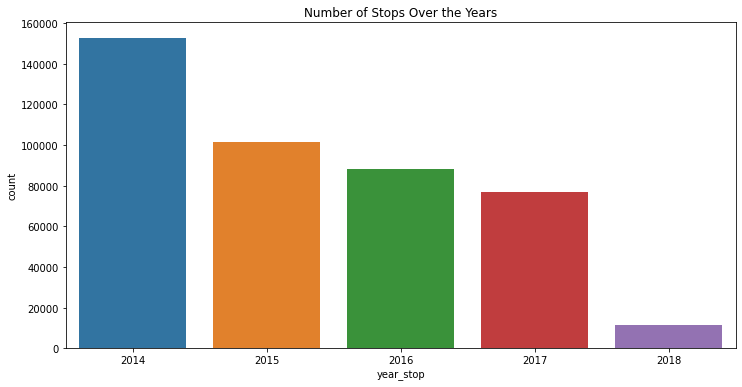

In [35]:
# Plotting the number of stops over time
plot_data_bar(df, 'year_stop', 'Number of Stops Over the Years', plot_type='count')

<Figure size 864x432 with 0 Axes>

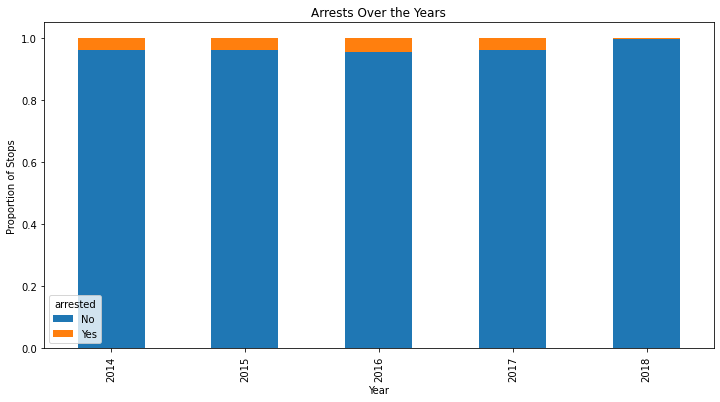

In [36]:
# Plotting arrests over time
plot_data_bar(df, 'arrested', 'Arrests Over the Years', plot_type='bar')

<Figure size 864x432 with 0 Axes>

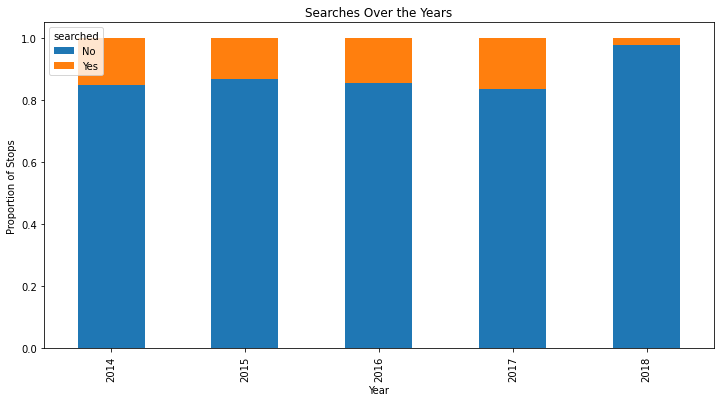

In [37]:
# Plotting searches over time
plot_data_bar(df, 'searched', 'Searches Over the Years', plot_type='bar')

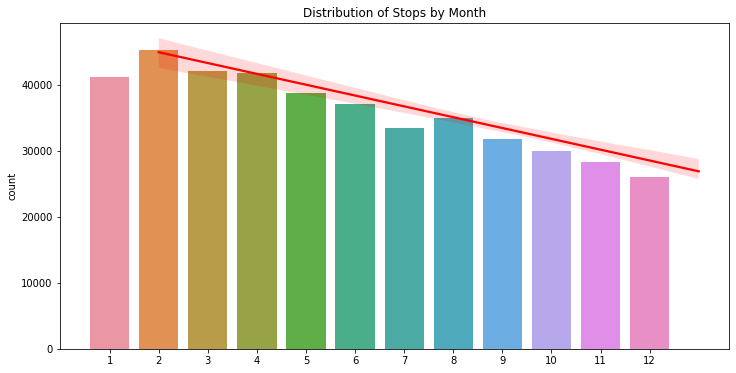

In [51]:
# Plotting the distribution of stops by month with a trendline
plot_data_bar(df, 'month_stop', 'Distribution of Stops by Month', plot_type='count', trendline=True)

In [39]:
def process_date_column(df, date_column='date_stop', new_column='day_of_week', abbreviated=False):
    """
    Converts a date column to datetime format and extracts day names into a new column.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - date_column (str, optional): The name of the date column. Default is 'date_stop'.
    - new_column (str, optional): The name of the new column to store day names. Default is 'day_of_week'.
    - abbreviated (bool, optional): If True, uses abbreviated day names (e.g., Mon, Tue). Default is False.

    Returns:
    - DataFrame: The modified DataFrame.
    """
    df[date_column] = pd.to_datetime(df[date_column])

    if abbreviated:
        df[new_column] = df[date_column].dt.strftime('%a')
    else:
        df[new_column] = df[date_column].dt.day_name()

    return df

In [40]:
# Assuming 'df' is your DataFrame
df = process_date_column(df)
# or with abbreviated day names
# processed_df = process_date_column(df, abbreviated=True)

In [41]:
print(np.unique(df['day_of_week']))

['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']


In [42]:
def plot_data(data, x, title, plot_type='count', trendline=False, color='red', order=None):
    """
    Plots data based on the specified parameters.

    Parameters:
    - data (DataFrame): The DataFrame containing the data to be plotted.
    - x (str): The column on the x-axis.
    - title (str): The title of the plot.
    - plot_type (str, optional): Type of plot to be generated.
      Options: 'countplot', 'heatmap', 'lineplot', 'barplot', 'violinplot', 'scatterplot'. Default is 'countplot'.
    - trendline (bool, optional): If True, a trendline will be added to the plot. Default is False.
    - color (str, optional): The color of the trendline if added. Default is 'red'.
    - order (list, optional): Order of categories for categorical plots. Default is None.

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    if plot_type == 'countplot':
        sns.countplot(x=x, data=data, order=order)
    elif plot_type == 'heatmap':
        heatmap_data = data.groupby(['day_of_week', 'hour']).size().unstack()
        plt.figure(figsize=(15, 8))
        sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=.5)
        plt.xlabel('Hour')
        plt.ylabel('Day of the Week')
    elif plot_type == 'lineplot':
        monthly_stops = data.groupby(['year_stop', 'month_stop']).size()
        monthly_stops.plot(marker='o')
        plt.xticks(rotation=45)
        plt.xlabel('Year-Month')
        plt.ylabel('Number of Stops')
    elif plot_type == 'barplot':
        searches_by_day = data.groupby('day_of_week')['searched'].mean()
        searches_by_day.sort_values().plot(kind='bar')
        plt.xlabel('Day of the Week')
        plt.ylabel('Proportion of Searches')
    elif plot_type == 'violinplot':
        sns.violinplot(x='day_of_week', y='hour', data=data, inner='quartile', palette='viridis')
        plt.xlabel('Day of the Week')
        plt.ylabel('Hour of the Day')
    elif plot_type == 'scatterplot':
        monthly_searches = data.groupby(['year_stop', 'month_stop'])['searched'].mean()
        monthly_searches.plot(marker='o', color=color)
        plt.xticks(rotation=45)
        plt.xlabel('Year-Month')
        plt.ylabel('Proportion of Searches')

    if trendline:
        sns.regplot(x=data[x].value_counts().index, y=data[x].value_counts().values, scatter=False, color=color)

    plt.title(title)
    plt.show()

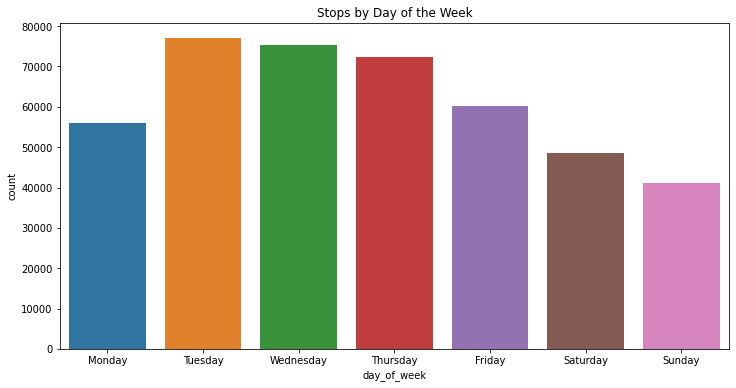

In [43]:
# Countplot of stops by day of the week
plot_data(df, 'day_of_week', 'Stops by Day of the Week', plot_type='countplot', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

<Figure size 864x432 with 0 Axes>

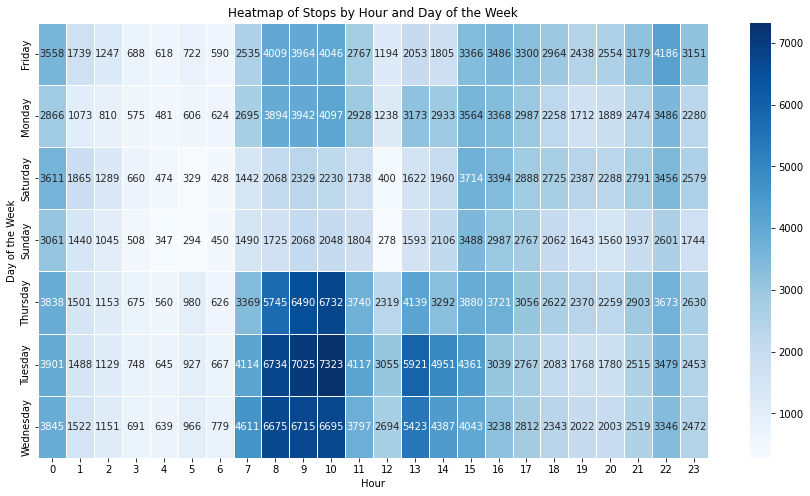

In [44]:
# Heatmap of stops by hour and day
plot_data(df, '', 'Heatmap of Stops by Hour and Day of the Week', plot_type='heatmap')

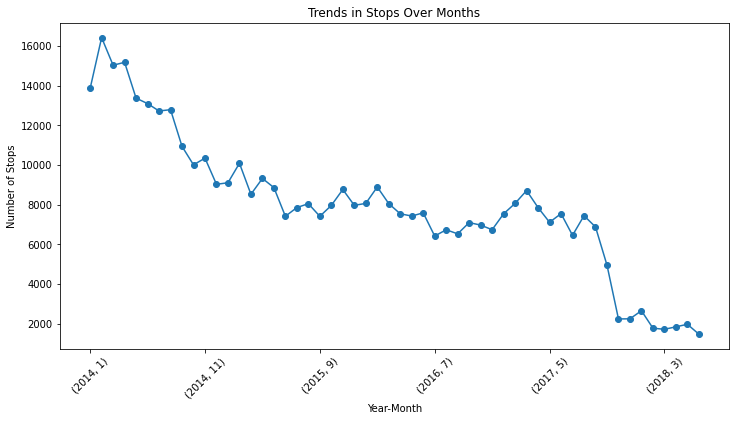

In [45]:
# Trends in stops over months
plot_data(df, '', 'Trends in Stops Over Months', plot_type='lineplot')

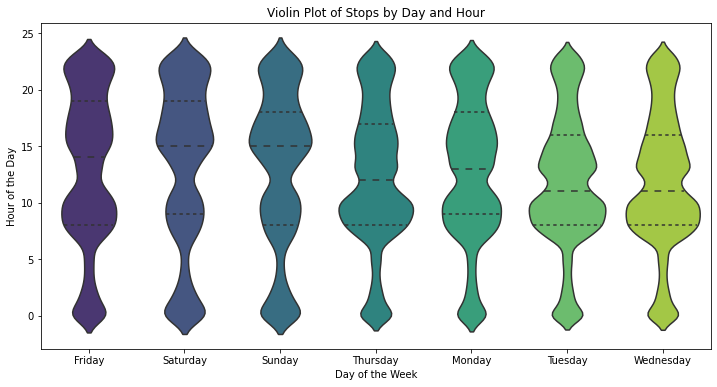

In [47]:
# Violin plot of stops by day and hour
plot_data(df, '', 'Violin Plot of Stops by Day and Hour', plot_type='violinplot')

<center>Temporal Analysis Ends Here</center>